In [1]:
#%matplotlib notebook
%matplotlib inline

from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
# Use the create_engine function to create the connection to the target database...Note: this doesn't actually open the conn.
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model --> creates a Base object
Base = automap_base()
# reflect the tables --> creates ORM objects for each table in the 'hawaii.sqlite' database
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes (i.e. tables) that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Preview the Data Provided in Pandas (i.e. the tables in the sqlite database)
    # From the above, we know there are 2 tables, measurement and station, in the database...let's explore these tables

In [10]:
# Connect to the database hawaii.sqlite
conn = engine.connect()

# Import the data from the measurement table into a dataframe
measure_df = pd.read_sql("SELECT * FROM Measurement", conn)

In [11]:
# Preview the Data in the Measurement table
measure_df.head()


,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0


In [12]:
# Preview the information available for the table
measure_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19550 entries, 0 to 19549
Data columns (total 5 columns):
id         19550 non-null int64
station    19550 non-null object
date       19550 non-null object
prcp       18103 non-null float64
tobs       19550 non-null float64
dtypes: float64(2), int64(1), object(2)
memory usage: 763.8+ KB


In [13]:
# Import the data from the station table into a dataframe
station_df = pd.read_sql("SELECT * FROM station", conn)

In [14]:
# Preview the Data in the station dataframe...as expected from the above...there are 9 unique stations
station_df.head(10)

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,7,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,8,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


# Exploratory Climate Analysis

In [15]:
# Calculate the date 1 year ago from today
today = dt.date.today()
year_ago = today - dt.timedelta(days=365)
print(today)
print(year_ago)


2018-08-29
2017-08-29


In [16]:
# Perform queries to determine the earliest and most recent dates in the measurement data
    # Perform the query and place result into a numpy array from which we extract (use .ravel) the date element...just a cleaner
    # representation of the output as opposeed to the [('2010-01-01')] version.  

array1 = np.array(session.query(func.min(Measurement.date)).one())
earliest = np.ravel(array1)

array2 = np.array(session.query(func.max(Measurement.date)).one())
recent = np.ravel(array2)

print(f'The earliest date in the dataset is:     {earliest[0]}')

print(f'The most recent date in the dataset is:  {recent[0]}')

The earliest date in the dataset is:     2010-01-01
The most recent date in the dataset is:  2017-08-23


In [17]:
# Create a query that goes to the Measurement table and pulls the date and prcp data for 12 months between 2016-08-23 and
    # 2017-08-23

data_year = session.query(Measurement.date, Measurement.station, Measurement.prcp).\
                filter(Measurement.date > '2016-08-23').\
                filter(Measurement.date <= '2017-08-23').\
                order_by((Measurement.date).asc()).all()

In [18]:
# The above query returns a list of tuples from the measurement 'table' object.  We want to import these tuples into a pandas
    # dataframe which extracts the values from the tuples for input to the dataframe.
    # Add column labels to the df.

data_year_df = pd.DataFrame.from_records(data_year, columns=('Date','Station','Prcp'))
data_year_df.head()

,Date,Station,Prcp
0,2016-08-24,USC00519397,0.08
1,2016-08-24,USC00513117,2.15
2,2016-08-24,USC00514830,2.28
3,2016-08-24,USC00517948,NaN
4,2016-08-24,USC00519523,1.22


In [19]:
# Ensure that the Date column is in datetime format to facilitate plotting

data_year_df['Date'] = pd.to_datetime(data_year_df['Date'])
data_year_df.head()


,Date,Station,Prcp
0,2016-08-24,USC00519397,0.08
1,2016-08-24,USC00513117,2.15
2,2016-08-24,USC00514830,2.28
3,2016-08-24,USC00517948,NaN
4,2016-08-24,USC00519523,1.22


In [20]:
data_year_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2223 entries, 0 to 2222
Data columns (total 3 columns):
Date       2223 non-null datetime64[ns]
Station    2223 non-null object
Prcp       2015 non-null float64
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 52.2+ KB


In [21]:
# Since there are multiple stations measuring precipitation each day, we need to combine the prcp values such that there is 
    # a single prcp value for each date.  We will accomplish this by first grouping the dataframe by date, then calculating
    # the average precipitation across all stations for that date.  We will populate a new dataframe with the date and 
    # average precipitation values.  

measure_avg_prcp_year_df = data_year_df.groupby('Date', as_index=False, sort=False)['Prcp'].mean()
measure_avg_prcp_year_df.rename(columns={'Prcp':'Avg Prcp'}, inplace=True)
measure_avg_prcp_year_df.head()

,Date,Avg Prcp
0,2016-08-24,1.555000
1,2016-08-25,0.077143
2,2016-08-26,0.016667
3,2016-08-27,0.064000
4,2016-08-28,0.516667


In [22]:
# Change the Date column to the index to facilitate plotting

measure_avg_prcp_year_df.set_index('Date',  inplace=True)
measure_avg_prcp_year_df.head()


,Avg Prcp
Date,
2016-08-24,1.555000
2016-08-25,0.077143
2016-08-26,0.016667
2016-08-27,0.064000
2016-08-28,0.516667


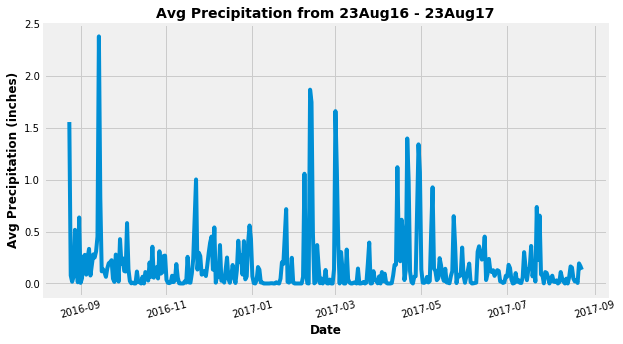

In [23]:
# Create a line plot of the Average Precipitation (across all stations) for the 12 month period from 23Aug16 - 23Aug17.

plt.figure(figsize=(9,5))
plt.plot(measure_avg_prcp_year_df.index, measure_avg_prcp_year_df['Avg Prcp'])
plt.title('Avg Precipitation from 23Aug16 - 23Aug17', fontsize=14, fontweight='bold')
plt.xticks(rotation=15,fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Date',fontsize=12, fontweight='bold')
plt.ylabel('Avg Precipitation (inches)',fontsize=12, fontweight='bold')
plt.show()

In [24]:
# Use Pandas to calculate the summary statistics for the precipitation data

precipitation = measure_avg_prcp_year_df['Avg Prcp'].describe()
pd.DataFrame(precipitation, columns=['Avg Prcp'])

,Avg Prcp
count,365.000000
mean,0.169987
std,0.295722
min,0.000000
25%,0.008571
50%,0.070000
75%,0.191667
max,2.380000


In [25]:
# How many stations are available in this dataset?  Method #1 using a query from the database:

session.query(Station.name).count()

9

In [26]:
# How many stations are available in this dataset?  Using the method available from the previously created dataframe

# Determine how many stations there are and what their names are from the measure table

station_count = measure_df['station'].nunique()
station_names = measure_df['station'].unique()
print(station_count)
print(station_names)

9
['USC00519397' 'USC00513117' 'USC00514830' 'USC00517948' 'USC00518838'
 'USC00519523' 'USC00519281' 'USC00511918' 'USC00516128']


In [27]:
# What are the most active stations?
# List the stations and the counts in descending order.

session.query(Measurement.station,func.count(Measurement.station)).\
        group_by(Measurement.station).\
        order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [28]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?

session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()


[(54.0, 85.0, 71.66378066378067)]

In [29]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station

tobs_stn_281 = session.query(Measurement.date, Measurement.station, Measurement.tobs).\
                filter(Measurement.station == 'USC00519281').\
                filter(Measurement.date > '2016-08-23').\
                filter(Measurement.date <= '2017-08-23').all()


In [30]:
# The above query returns a list of tuples from the measurement 'table' object.  We want to import these tuples into a pandas
    # dataframe which extracts the values from the tuples for input to the dataframe.
    # Add column labels to the df.

tobs_stn_281_df = pd.DataFrame.from_records(tobs_stn_281, columns=('Date','Station','Tobs'))
tobs_stn_281_df.head()

,Date,Station,Tobs
0,2016-08-24,USC00519281,77.0
1,2016-08-25,USC00519281,80.0
2,2016-08-26,USC00519281,80.0
3,2016-08-27,USC00519281,75.0
4,2016-08-28,USC00519281,73.0


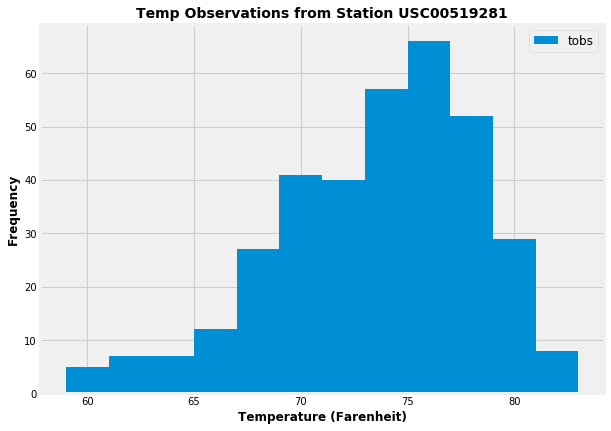

In [31]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

plt.figure(figsize=(9,6.8))
plt.hist(tobs_stn_281_df['Tobs'], 12)
plt.title('Temp Observations from Station USC00519281', fontsize=14, fontweight='bold')
plt.legend(('tobs',),loc='upper right', fontsize=12)
plt.xlabel('Temperature (Farenheit)',fontsize=12, fontweight='bold')
plt.ylabel('Frequency',fontsize=12, fontweight='bold')
plt.show()

In [32]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates

def calc_temps(start_date, end_date):
    results = session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
                filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
    return results

In [33]:
# Accept user inputs for start date and end date in the format YYYY-MM-DD, call the calc_temps function and print the results
    # Test case uses 2012-02-28 and 2012-03-05 for start and end dates, respectively

start_date = '2012-02-28'
end_date = '2012-03-05'

#start_date = input('Enter the start date (format YYYY-MM-DD): ') #use for actual user input
#end_date = input('Enter the end date (format YYYY-MM-DD): ') #use for actual user input

results = calc_temps(start_date, end_date) # Note: create this variable to be able to use the query result in future
                                                    #analysis/plot
    
print('The minimum, average and maximum temperatures during that time were:\n'
    f'   Tmin = {round(results[0][0],1)}\n'
    f'   Tavg = {round(results[0][1],1)}\n'
    f'   Tmax = {round(results[0][2],1)}')

The minimum, average and maximum temperatures during that time were:
   Tmin = 62.0
   Tavg = 69.6
   Tmax = 74.0


In [34]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.

start_date = '2011-02-28'
end_date = '2011-03-05'

#start_date = input('Enter the start date (format YYYY-MM-DD): ') #use for actual user input
#end_date = input('Enter the end date (format YYYY-MM-DD): ') #use for actual user input

results = calc_temps(start_date, end_date) # Note: create this variable to be able to use the query result in future
                                                    #analysis/plot

print('The minimum, average and maximum temperatures during that time were:\n'
    f'   Tmin = {round(results[0][0],1)}\n'
    f'   Tavg = {round(results[0][1],1)}\n'
    f'   Tmax = {round(results[0][2],1)}')

The minimum, average and maximum temperatures during that time were:
   Tmin = 61.0
   Tavg = 69.8
   Tmax = 75.0


In [35]:
# Set up variables to be used in plot...Note: t_min is 1st element in tuple; t_avg is 2nd element; t_max is 3rd element 

t_min = [x[0] for x in results]
t_avg = [x[1] for x in results]
t_max = [x[2] for x in results]
yerr = (t_max[0] - t_min[0])
x_axis = np.arange(len(t_avg))

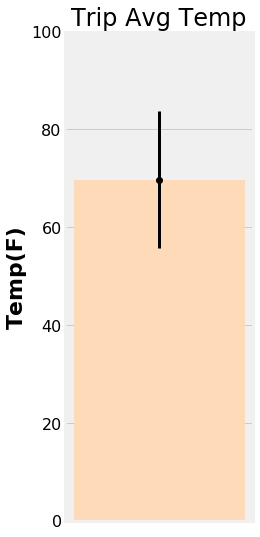

In [36]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

plt.figure(figsize=(3,9))
plt.bar(x_axis[0], t_avg[0], width=.3, color='peachpuff')
plt.errorbar(x_axis[0], t_avg[0], yerr, linestyle='solid', color='black', fmt='o',linewidth=3)
plt.xticks([])
plt.ylim(0,100)
plt.tick_params(labelsize=16)
plt.ylabel('Temp(F)', fontsize=22, fontweight='bold')
plt.title('Trip Avg Temp', fontsize=24)
plt.show()

In [37]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

station_avg_prcp = session.query(Measurement.station,func.avg(Measurement.prcp)).\
                        group_by(Measurement.station).\
                        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).\
                        order_by(func.avg(Measurement.tobs).desc()).all()

# The result is a list of tuples containing the Station and the average precipitation recorded between start and end date

In [38]:
# Now we want to add the station info (i.e. name, lat, long, elev) to this list of tuples created above

stn_result_list = []

for stn in station_avg_prcp: # create a loop to cycle through each station in the above list
    tgt_stn_info = session.query(Station.name, Station.latitude, Station.longitude, Station.elevation).\
        filter(Station.station == stn[0]).all() # stn[0] represents the 'station' we're looking for (e.g. USC00519397)
    stn_result_list.append((stn[0], tgt_stn_info[0][0], tgt_stn_info[0][1], tgt_stn_info[0][2],\
        tgt_stn_info[0][3], stn[1])) # for each station append the station, name, lat, long, elev, avg temp into a tuple


In [39]:
# Put the results of this newly created list of tuples (i.e. stn_result_list) into a dataframe with column labels for viewing

columns = ['Station', 'Name', 'Latitude', 'Longitude', 'Elevation', 'Avg Precipitation']

stn_result_df = pd.DataFrame([x for x in stn_result_list], columns=columns)
stn_result_df.fillna(0, inplace=True) # as opposed to converting 'None' preciptation to 'NaN', convert to 0
stn_result_df.head(10)

,Station,Name,Latitude,Longitude,Elevation,Avg Precipitation
0,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6,0.582500
1,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0,0.230000
2,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4,0.241667
3,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5,0.365000
4,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0,0.392000
5,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6,0.240000
6,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9,0.000000
7,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9,0.371667
8,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9,0.126000


## Optional Challenge Assignment

In [40]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [41]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [22]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


,tmin,tavg,tmax
date,,,
2018-01-01,62.0,69.153846,77.0
2018-01-02,60.0,69.396226,77.0
2018-01-03,62.0,68.909091,77.0
2018-01-04,58.0,70.000000,76.0
2018-01-05,56.0,67.964286,76.0


<IPython.core.display.Javascript object>


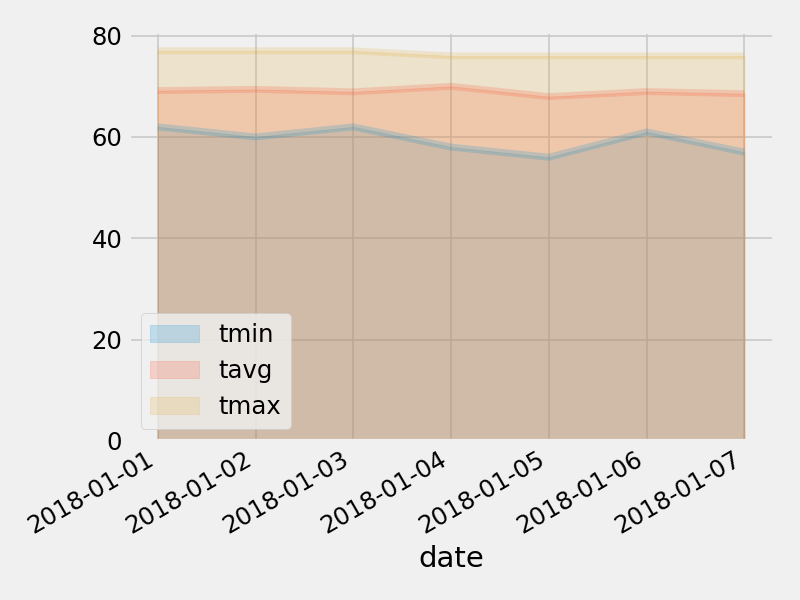

In [23]:
# Plot the daily normals as an area plot with `stacked=False`
